# Special Token 찾기

In [5]:
import pandas as pd
import re
from collections import Counter

def extract_special_tokens(text):
    return set(re.findall(r'#\w+#', text))

def analyze_dataset(df, name, dialogue_column='dialogue', summary_column=None):
    dialogue_tokens = set()
    summary_tokens = set()
    mismatched_tokens = set()

    for _, row in df.iterrows():
        d_tokens = extract_special_tokens(row[dialogue_column])
        dialogue_tokens.update(d_tokens)
        
        if summary_column:
            s_tokens = extract_special_tokens(row[summary_column])
            summary_tokens.update(s_tokens)
            mismatched_tokens.update(s_tokens - d_tokens)

    print(f"\n{name} 데이터셋 분석:")
    print(f"대화 unique token 수: {len(dialogue_tokens)}")
    if summary_column:
        print(f"요약 unique token 수: {len(summary_tokens)}")
        print(f"공통 token 수: {len(dialogue_tokens & summary_tokens)}")
        print(f"불일치 token 수 (요약에만 있음): {len(mismatched_tokens)}")
    
    return dialogue_tokens, summary_tokens, mismatched_tokens

def analyze_all_datasets(train_path, valid_path, test_path):
    train_df = pd.read_csv(train_path)
    valid_df = pd.read_csv(valid_path)
    test_df = pd.read_csv(test_path)

    train_d, train_s, train_m = analyze_dataset(train_df, "Train", summary_column='summary')
    valid_d, valid_s, valid_m = analyze_dataset(valid_df, "Valid", summary_column='summary')
    test_d, _, _ = analyze_dataset(test_df, "Test")  # Test에는 summary 열이 없음

    all_dialogue_tokens = train_d | valid_d | test_d
    all_summary_tokens = train_s | valid_s
    all_tokens = all_dialogue_tokens | all_summary_tokens

    print("\n전체 데이터셋 분석:")
    print(f"총 unique token 수: {len(all_tokens)}")
    print(f"모든 데이터셋의 대화에 공통으로 나타나는 token 수: {len(train_d & valid_d & test_d)}")
    
    print("\n데이터셋 간 불일치:")
    print(f"Train 대화에만 있는 token: {len(train_d - (valid_d | test_d))}")
    print(f"Valid 대화에만 있는 token: {len(valid_d - (train_d | test_d))}")
    print(f"Test 대화에만 있는 token: {len(test_d - (train_d | valid_d))}")

    print("\n요약에서만 나타나는 token:")
    print(f"Train: {train_m}")
    print(f"Valid: {valid_m}")

    return all_tokens

def create_token_mapping(tokens):
    return {token: re.sub(r'\d+', '', token) for token in tokens}

# 메인 실행 코드
train_path = './data/train.csv'
valid_path = './data/dev.csv'
test_path = './data/test.csv'

all_tokens = analyze_all_datasets(train_path, valid_path, test_path)

# Token 일반화 매핑 생성
token_mapping = create_token_mapping(all_tokens)

print("\nToken 일반화 매핑:")
for original, generalized in token_mapping.items():
    if original != generalized:
        print(f"{original} -> {generalized}")

# Token 일반화 함수
def generalize_tokens(text, mapping):
    for original, generalized in mapping.items():
        text = text.replace(original, generalized)
    return text


Train 데이터셋 분석:
대화 unique token 수: 16
요약 unique token 수: 6
공통 token 수: 6
불일치 token 수 (요약에만 있음): 0

Valid 데이터셋 분석:
대화 unique token 수: 7
요약 unique token 수: 4
공통 token 수: 3
불일치 token 수 (요약에만 있음): 1

Test 데이터셋 분석:
대화 unique token 수: 6

전체 데이터셋 분석:
총 unique token 수: 17
모든 데이터셋의 대화에 공통으로 나타나는 token 수: 5

데이터셋 간 불일치:
Train 대화에만 있는 token: 8
Valid 대화에만 있는 token: 0
Test 대화에만 있는 token: 0

요약에서만 나타나는 token:
Train: set()
Valid: {'#사람1#'}

Token 일반화 매핑:
#Person4# -> #Person#
#Person1# -> #Person#
#Person5# -> #Person#
#Person2# -> #Person#
#Person7# -> #Person#
#사람1# -> #사람#
#Person6# -> #Person#
#Person3# -> #Person#


In [4]:
import pandas as pd
import re
from collections import Counter

def extract_special_tokens(text):
    return set(re.findall(r'#\w+#', text))

def analyze_dataset(df, name, dialogue_column='dialogue', summary_column=None):
    dialogue_tokens = set()
    summary_tokens = set()

    for _, row in df.iterrows():
        dialogue_tokens.update(extract_special_tokens(row[dialogue_column]))
        if summary_column:
            summary_tokens.update(extract_special_tokens(row[summary_column]))

    print(f"\n{name} 데이터셋 분석:")
    print(dialogue_tokens)
    print(f"대화 unique token 수: {len(dialogue_tokens)}")
    if summary_column:
        print(f"요약 unique token 수: {len(summary_tokens)}")
        print(f"공통 token 수: {len(dialogue_tokens & summary_tokens)}")
    
    return dialogue_tokens, summary_tokens

def analyze_all_datasets(train_path, valid_path, test_path):
    train_df = pd.read_csv(train_path)
    valid_df = pd.read_csv(valid_path)
    test_df = pd.read_csv(test_path)

    train_d, train_s = analyze_dataset(train_df, "Train", summary_column='summary')
    valid_d, valid_s = analyze_dataset(valid_df, "Valid", summary_column='summary')
    test_d, _ = analyze_dataset(test_df, "Test")

    all_tokens = train_d | train_s | valid_d | valid_s | test_d
    return all_tokens

def optimize_special_tokens(tokens):
    # 토큰 일반화 (숫자 제거)
    generalized_tokens = set(re.sub(r'\d+', '', token) for token in tokens)
    
    # '사람'을 'Person'으로 통일
    unified_tokens = set(token.replace('사람', 'Person') for token in generalized_tokens)
    
    return sorted(unified_tokens)

# 메인 실행 코드
train_path = './data/train.csv'
valid_path = './data/dev.csv'
test_path = './data/test.csv'

all_tokens = analyze_all_datasets(train_path, valid_path, test_path)
optimized_tokens = optimize_special_tokens(all_tokens)

print("\n모든 Special Token 목록:")
for token in all_tokens:
    print(token)

print("\n최적화된 Special Token 목록:")
for token in optimized_tokens:
    print(token)

# 토큰 사용 빈도 분석
def analyze_token_frequency(df, column, tokens):
    text = ' '.join(df[column].astype(str))
    return {token: len(re.findall(re.escape(token), text)) for token in tokens}

train_df = pd.read_csv(train_path)
token_frequency = analyze_token_frequency(train_df, 'dialogue', optimized_tokens)

print("\nToken 사용 빈도 (Train 데이터셋 기준):")
for token, freq in sorted(token_frequency.items(), key=lambda x: x[1], reverse=True):
    print(f"{token}: {freq}")


Train 데이터셋 분석:
{'#CarNumber#', '#PassportNumber#', '#Person#', '#CardNumber#', '#Person3#', '#Email#', '#Person6#', '#DateOfBirth#', '#Person2#', '#SSN#', '#Person7#', '#Address#', '#Person5#', '#PhoneNumber#', '#Person1#', '#Person4#'}
대화 unique token 수: 16
요약 unique token 수: 6
공통 token 수: 6

Valid 데이터셋 분석:
{'#DateOfBirth#', '#Person2#', '#Address#', '#Person3#', '#PhoneNumber#', '#Person1#', '#Person4#'}
대화 unique token 수: 7
요약 unique token 수: 4
공통 token 수: 3

Test 데이터셋 분석:
{'#Person2#', '#Address#', '#Person3#', '#PassportNumber#', '#PhoneNumber#', '#Person1#'}
대화 unique token 수: 6

모든 Special Token 목록:
#CarNumber#
#PassportNumber#
#Person#
#사람1#
#CardNumber#
#Person3#
#Email#
#Person6#
#DateOfBirth#
#Person2#
#SSN#
#Person7#
#Address#
#Person5#
#PhoneNumber#
#Person1#
#Person4#

최적화된 Special Token 목록:
#Address#
#CarNumber#
#CardNumber#
#DateOfBirth#
#Email#
#PassportNumber#
#Person#
#PhoneNumber#
#SSN#

Token 사용 빈도 (Train 데이터셋 기준):
#Person1#: 61318
#Person2#: 56446
#Person3#: 384


: 

# Encoder/Decoder max length 찾기

Train Dialogue 통계:
  최소 길이: 43
  최대 길이: 1115
  평균 길이: 204.54
  중앙값 길이: 186.0
  90퍼센타일 길이: 320.00
  95퍼센타일 길이: 370.00
  99퍼센타일 길이: 543.00
Train Summary 통계:
  최소 길이: 8
  최대 길이: 198
  평균 길이: 40.67
  중앙값 길이: 37.0
  90퍼센타일 길이: 63.00
  95퍼센타일 길이: 72.00
  99퍼센타일 길이: 94.00
Valid Dialogue 통계:
  최소 길이: 58
  최대 길이: 765
  평균 길이: 203.66
  중앙값 길이: 187.0
  90퍼센타일 길이: 324.20
  95퍼센타일 길이: 369.00
  99퍼센타일 길이: 494.02
Valid Summary 통계:
  최소 길이: 11
  최대 길이: 116
  평균 길이: 38.64
  중앙값 길이: 35.0
  90퍼센타일 길이: 61.20
  95퍼센타일 길이: 70.10
  99퍼센타일 길이: 92.12
Test Dialogue 통계:
  최소 길이: 50
  최대 길이: 1366
  평균 길이: 211.77
  중앙값 길이: 195.0
  90퍼센타일 길이: 334.20
  95퍼센타일 길이: 390.10
  99퍼센타일 길이: 489.78


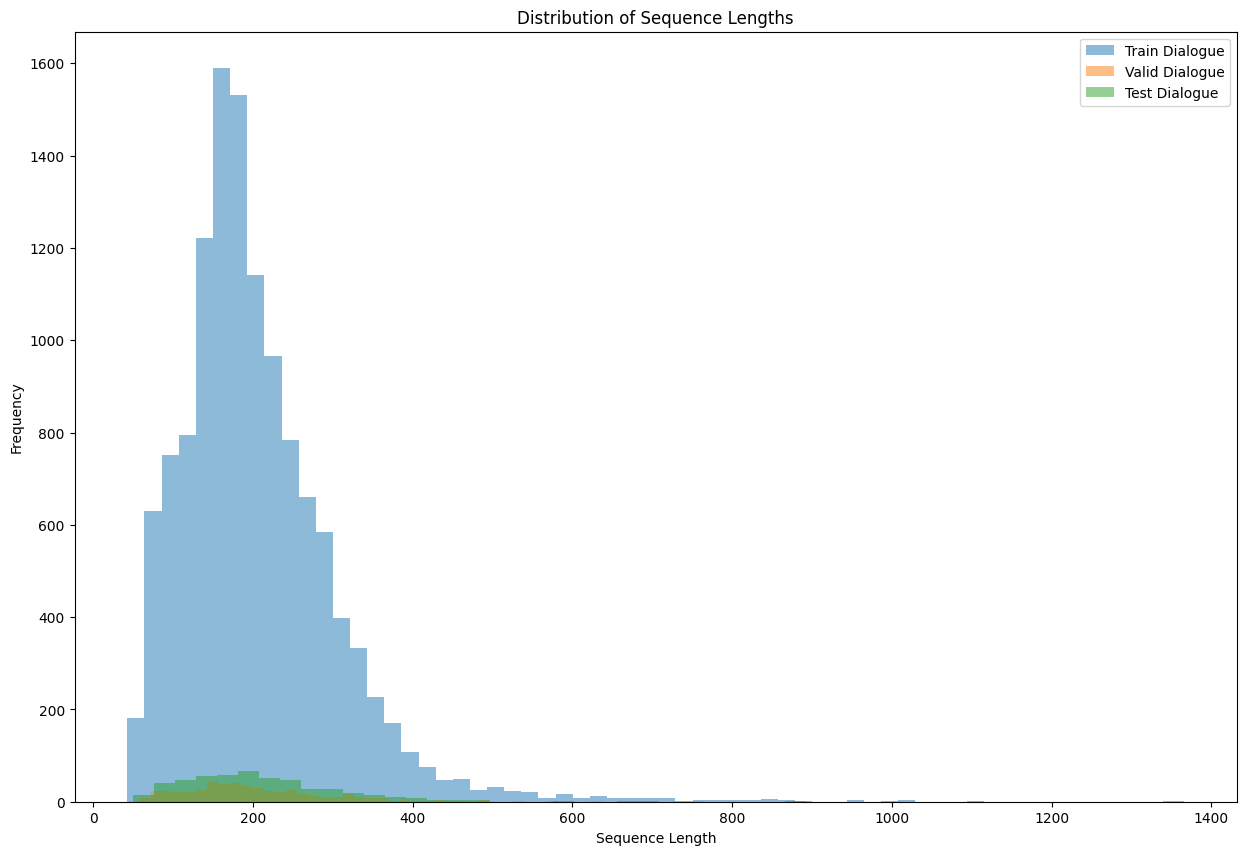


추천 encoder_max_len: 371
추천 decoder_max_len: 72


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

def analyze_sequence_lengths(train_path, valid_path, test_path, model_name="digit82/kobart-summarization"):
    # 데이터 로드
    train_df = pd.read_csv(train_path)
    valid_df = pd.read_csv(valid_path)
    test_df = pd.read_csv(test_path)
    
    # 토크나이저 로드
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    # 길이 계산 함수
    def get_lengths(texts):
        return [len(tokenizer.encode(text)) for text in texts]
    
    # 각 데이터셋의 길이 계산
    train_dialogue_lengths = get_lengths(train_df['dialogue'])
    train_summary_lengths = get_lengths(train_df['summary'])
    valid_dialogue_lengths = get_lengths(valid_df['dialogue'])
    valid_summary_lengths = get_lengths(valid_df['summary'])
    test_dialogue_lengths = get_lengths(test_df['dialogue'])
    
    # 통계 계산
    def print_stats(name, lengths):
        print(f"{name} 통계:")
        print(f"  최소 길이: {np.min(lengths)}")
        print(f"  최대 길이: {np.max(lengths)}")
        print(f"  평균 길이: {np.mean(lengths):.2f}")
        print(f"  중앙값 길이: {np.median(lengths)}")
        print(f"  90퍼센타일 길이: {np.percentile(lengths, 90):.2f}")
        print(f"  95퍼센타일 길이: {np.percentile(lengths, 95):.2f}")
        print(f"  99퍼센타일 길이: {np.percentile(lengths, 99):.2f}")
    
    print_stats("Train Dialogue", train_dialogue_lengths)
    print_stats("Train Summary", train_summary_lengths)
    print_stats("Valid Dialogue", valid_dialogue_lengths)
    print_stats("Valid Summary", valid_summary_lengths)
    print_stats("Test Dialogue", test_dialogue_lengths)
    
    # 히스토그램 그리기
    plt.figure(figsize=(15, 10))
    plt.hist(train_dialogue_lengths, bins=50, alpha=0.5, label='Train Dialogue')
    plt.hist(valid_dialogue_lengths, bins=50, alpha=0.5, label='Valid Dialogue')
    plt.hist(test_dialogue_lengths, bins=50, alpha=0.5, label='Test Dialogue')
    # plt.hist(train_summary_lengths, bins=50, alpha=0.5, label='Train Summary')
    # plt.hist(valid_summary_lengths, bins=50, alpha=0.5, label='Valid Summary')
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sequence Lengths')
    plt.legend()
    plt.show()
    
    # 최적 길이 추천
    def recommend_length(lengths, coverage=0.95):
        return int(np.percentile(lengths, coverage * 100))
    
    encoder_max_len = recommend_length(train_dialogue_lengths + valid_dialogue_lengths + test_dialogue_lengths)
    decoder_max_len = recommend_length(train_summary_lengths + valid_summary_lengths)
    
    print(f"\n추천 encoder_max_len: {encoder_max_len}")
    print(f"추천 decoder_max_len: {decoder_max_len}")
    
    return encoder_max_len, decoder_max_len

train_path = './data/train.csv'
valid_path = './data/dev.csv'
test_path = './data/test.csv'

encoder_max_len, decoder_max_len = analyze_sequence_lengths(train_path, valid_path, test_path)

In [2]:
import csv
from transformers import AutoTokenizer

# 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained('MLP-KTLim/llama-3-Korean-Bllossom-8B-gguf-Q4_K_M')

# train.csv 파일 경로
train_file_path = "./data/test.csv"

# dialogue 열의 토큰 개수를 저장할 리스트
token_counts = []

# train.csv 파일 읽기
with open(train_file_path, "r", encoding="utf-8") as file:
    reader = csv.reader(file)
    next(reader)  # 헤더 건너뛰기
    for row in reader:
        dialogue = row[1]  # dialogue 열 추출
        tokens = tokenizer.encode(dialogue)
        token_count = len(tokens)
        token_counts.append(token_count)

# 토큰 개수의 최대값
max_tokens = max(token_counts)

# 100 단위로 구간 나누기
ranges = list(range(0, max_tokens + 100, 100))

# 각 구간에 해당하는 대화의 개수 계산
range_counts = [0] * len(ranges)
for count in token_counts:
    for i in range(len(ranges) - 1):
        if ranges[i] <= count < ranges[i + 1]:
            range_counts[i] += 1
            break

# 결과 출력
for i in range(len(ranges) - 1):
    start = ranges[i]
    end = ranges[i + 1]
    count = range_counts[i]
    print(f"{start} to {end} tokens: {count} dialogues")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


0 to 100 tokens: 64 dialogues
100 to 200 tokens: 227 dialogues
200 to 300 tokens: 144 dialogues
300 to 400 tokens: 49 dialogues
400 to 500 tokens: 10 dialogues
500 to 600 tokens: 2 dialogues
600 to 700 tokens: 1 dialogues
700 to 800 tokens: 0 dialogues
800 to 900 tokens: 1 dialogues
900 to 1000 tokens: 0 dialogues
1000 to 1100 tokens: 0 dialogues
1100 to 1200 tokens: 0 dialogues
1200 to 1300 tokens: 1 dialogues


훈련 데이터 분석:
Data sample:
     fname                                           dialogue  \
0  train_0  #Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...   
1  train_1  #Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...   
2  train_2  #Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...   
3  train_3  #Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...   
4  train_4  #Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...   

                                             summary     topic  
0  스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...   건강검진 받기  
1  파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...        백신  
2  #Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...     열쇠 찾기  
3  #Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...  여자친구가 있다  
4  말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...        댄스  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 

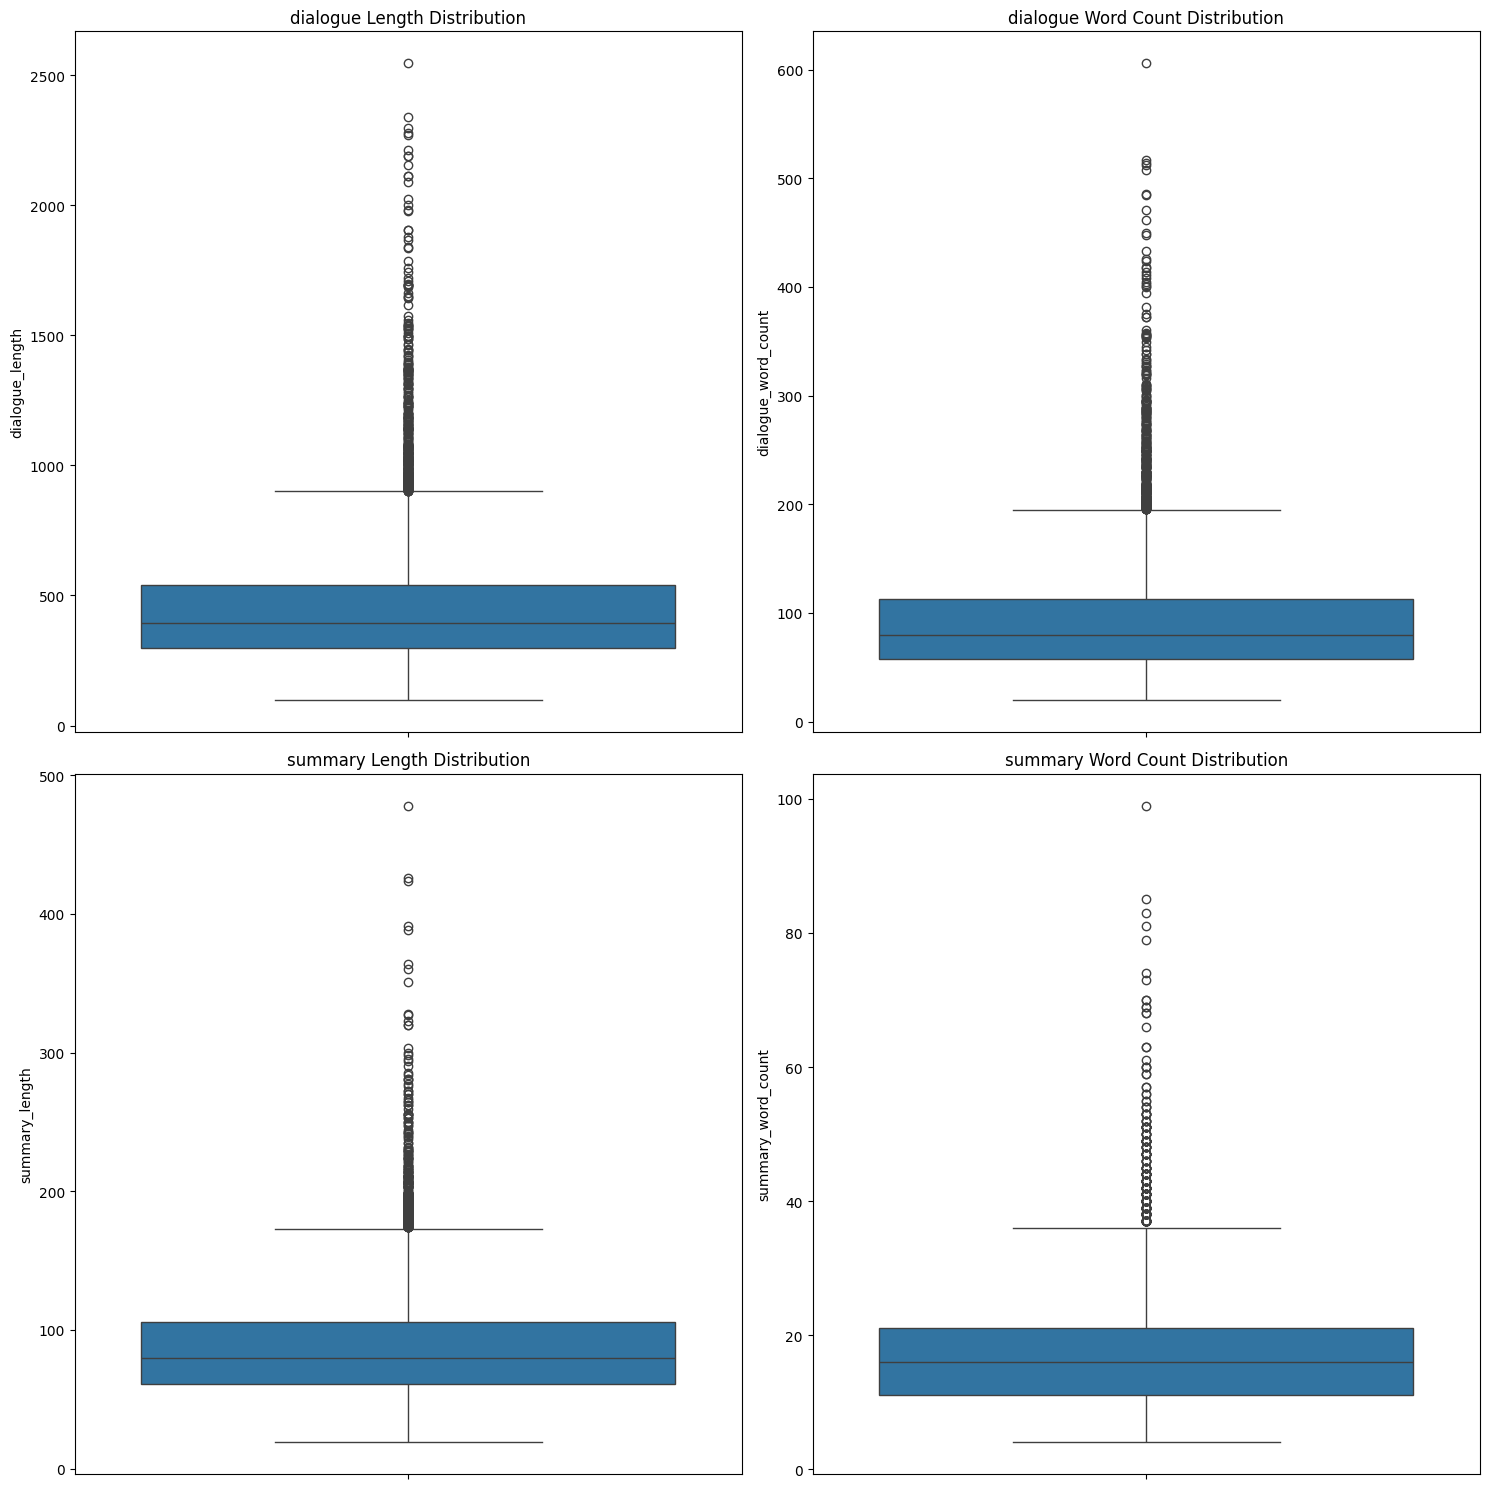

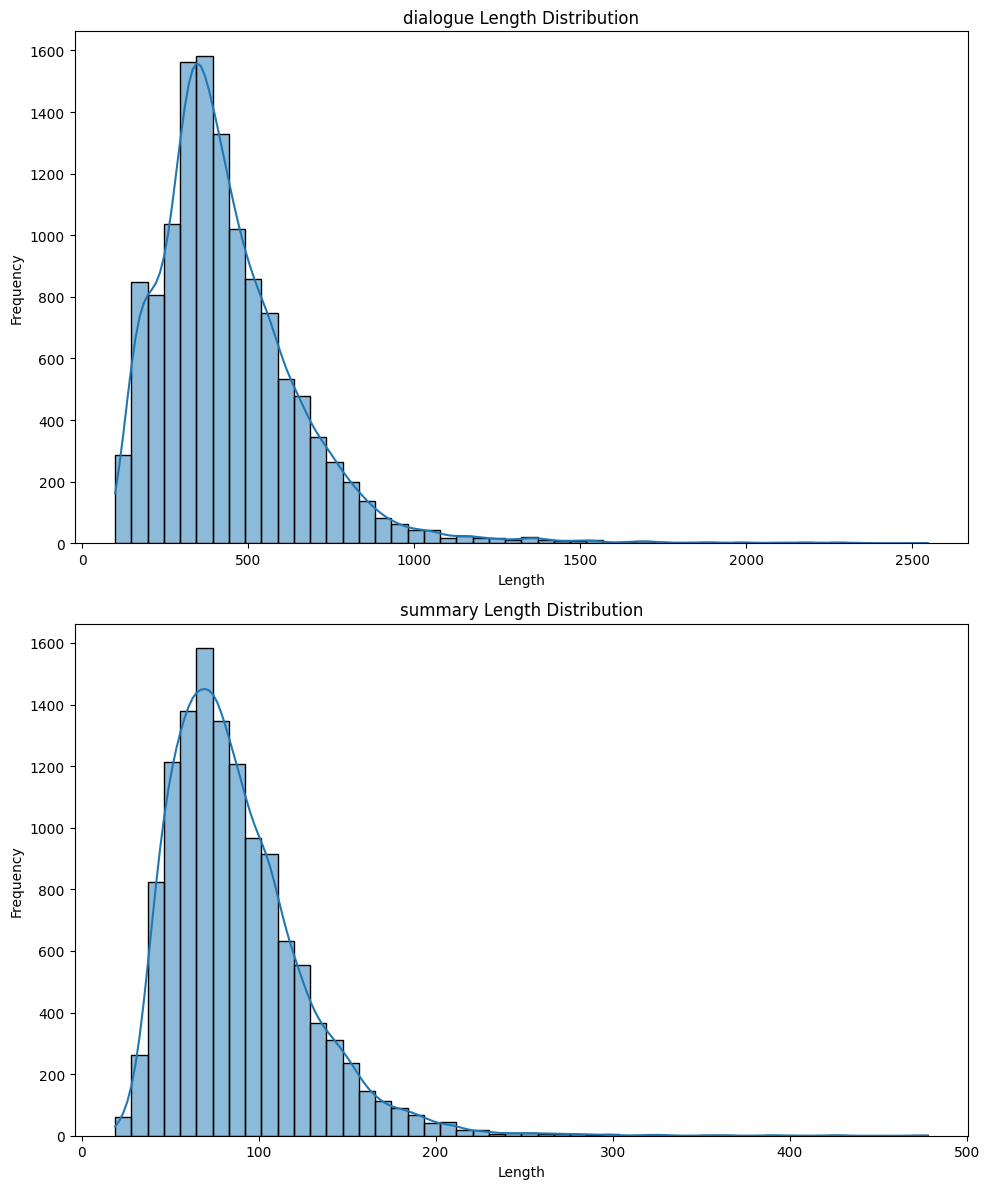


dialogue에서 가장 흔한 단어 20개:
[('#Person1#:', 61259), ('#Person2#:', 56402), ('수', 13622), ('것', 7376), ('저는', 6048), ('정말', 5826), ('있습니다.', 5773), ('네,', 5650), ('이', 4740), ('있나요?', 4642), ('더', 4565), ('하지만', 4530), ('그', 4393), ('어떻게', 4233), ('있어요.', 4156), ('제', 4052), ('그리고', 3602), ('나는', 3411), ('것을', 3316), ('있는', 3286)]

summary에서 가장 흔한 단어 20개:
[('#Person2#는', 7836), ('#Person1#은', 6808), ('#Person1#에게', 3262), ('대해', 2540), ('#Person2#에게', 2330), ('것을', 1582), ('#Person2#가', 1266), ('#Person1#이', 1258), ('말한다.', 1235), ('수', 1227), ('#Person2#의', 1221), ('위해', 1136), ('#Person1#는', 1119), ('#Person1#의', 1084), ('말합니다.', 1047), ('#Person1#과', 1038), ('그들은', 928), ('있다.', 806), ('합니다.', 788), ('있습니다.', 781)]

요약 통계:
총 샘플 수: 12451

dialogue 통계:
유니크한 dialogue 수: 12415
평균 dialogue 길이: 438.74
평균 dialogue 단어 수: 90.65

summary 통계:
유니크한 summary 수: 12437
평균 summary 길이: 87.39
평균 summary 단어 수: 16.92

dialogue 열에서 IllegalCharacterError 가능성이 있는 행 수: 1143
dialogue 열의 IllegalCharacterError 가능

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import unicodedata

def load_data(file_path):
    """CSV 파일을 pandas DataFrame으로 로드합니다."""
    return pd.read_csv(file_path)

def display_basic_info(df):
    """데이터프레임의 기본 정보를 출력합니다."""
    print("Data sample:")
    print(df.head())
    print("\nData info:")
    print(df.info())
    print("\nData description:")
    print(df.describe())

def add_text_features(df, columns):
    """지정된 열에 대해 텍스트 길이와 단어 수 특성을 추가합니다."""
    for column in columns:
        df[f'{column}_length'] = df[column].astype(str).apply(len)
        df[f'{column}_word_count'] = df[column].astype(str).apply(lambda x: len(x.split()))
    return df

def plot_distributions(df, columns):
    """지정된 열의 텍스트 길이와 단어 수 분포를 시각화합니다."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    for i, column in enumerate(columns):
        sns.boxplot(y=df[f'{column}_length'], ax=axes[i,0])
        axes[i,0].set_title(f'{column} Length Distribution')
        sns.boxplot(y=df[f'{column}_word_count'], ax=axes[i,1])
        axes[i,1].set_title(f'{column} Word Count Distribution')
    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(2, 1, figsize=(10, 12))
    for i, column in enumerate(columns):
        sns.histplot(df[f'{column}_length'], bins=50, kde=True, ax=axes[i])
        axes[i].set_title(f'{column} Length Distribution')
        axes[i].set_xlabel('Length')
        axes[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def sample_data(df, columns, n=5):
    """데이터에서 무작위로 샘플을 추출합니다."""
    sample = df.sample(n=n)
    print(f"\n무작위 샘플 {n}개:")
    for idx, row in sample.iterrows():
        print(f"Index {idx}:")
        for column in columns:
            print(f"{column}: {row[column]}")
        print()

def get_word_freq(text_series):
    """단어 빈도를 계산합니다."""
    words = ' '.join(text_series.astype(str).dropna()).split()
    return Counter(words)

def analyze_word_freq(df, columns):
    """지정된 열의 단어 빈도를 분석합니다."""
    for column in columns:
        word_freq = get_word_freq(df[column])
        print(f"\n{column}에서 가장 흔한 단어 20개:")
        print(word_freq.most_common(20))

def print_summary_stats(df, columns):
    """요약 통계를 출력합니다."""
    print("\n요약 통계:")
    print(f"총 샘플 수: {len(df)}")
    for column in columns:
        print(f"\n{column} 통계:")
        print(f"유니크한 {column} 수: {df[column].nunique()}")
        print(f"평균 {column} 길이: {df[f'{column}_length'].mean():.2f}")
        print(f"평균 {column} 단어 수: {df[f'{column}_word_count'].mean():.2f}")

def check_illegal_characters(text):
    """불법 문자를 확인합니다. '\n'은 제외합니다."""
    if pd.isna(text):  # NaN 값 체크
        return []
    illegal_chars = set()
    for char in str(text):
        if char == '\n':
            continue  # '\n'은 건너뜁니다
        if unicodedata.category(char) in ['Cc', 'Cf'] and char != '\n':  # Control characters, '\n' 제외
            illegal_chars.add(char)

    return illegal_chars

def find_illegal_char_rows(df, columns):
    """
    지정된 열에서 IllegalCharacterError 가능성이 있는 행을 찾고,
    고유한 Illegal character의 목록을 반환합니다.
    """
    all_illegal_chars = set()
    for column in columns:
        illegal_char_rows = df[df[column].apply(lambda x: len(check_illegal_characters(x)) > 0)]
        print(f"\n{column} 열에서 IllegalCharacterError 가능성이 있는 행 수:", len(illegal_char_rows))

        if len(illegal_char_rows) > 0:
            print(f"{column} 열의 IllegalCharacterError 가능성이 있는 예시:")
            for idx, row in illegal_char_rows.iterrows():
                print(f"Index {idx}:")
                print(f"{column}:", row[column])
                illegal_chars = check_illegal_characters(row[column])
                print("Illegal characters:", [c for c in illegal_chars])
                all_illegal_chars.update(illegal_chars)
                print()
    
    return all_illegal_chars

def analyze_unique_characters(df, columns):
    """지정된 열에서 사용된 유니크한 문자를 분석합니다."""
    for column in columns:
        all_chars = set(''.join(df[column].astype(str).dropna()))
        print(f"\n{column} 열에서 사용된 유니크한 문자 수:", len(all_chars))
        print("유니크한 문자 목록:")
        print(''.join(sorted(all_chars)))

        non_ascii = [char for char in all_chars if ord(char) > 127]
        print(f"\n{column} 열의 비 ASCII 문자 수:", len(non_ascii))
        if len(non_ascii) > 0:
            print("비 ASCII 문자 목록:")
            print(''.join(sorted(non_ascii)))

def main():
    # 데이터 로드
    train_df = load_data('./data/train_filtered.csv')

    columns_to_analyze = ['dialogue', 'summary']

    # 훈련 데이터 분석
    print("훈련 데이터 분석:")
    display_basic_info(train_df)
    
    train_df = add_text_features(train_df, columns_to_analyze)
    plot_distributions(train_df, columns_to_analyze)
    analyze_word_freq(train_df, columns_to_analyze)
    print_summary_stats(train_df, columns_to_analyze)
    all_illegal_chars = find_illegal_char_rows(train_df, columns_to_analyze)
    print('* all_illegal_chars\n')
    print(all_illegal_chars)
    analyze_unique_characters(train_df, columns_to_analyze)

main()